In [47]:
# Imports
import json
from pprint import pprint
import glob
import re
import pandas as pd
import seaborn as sns
from scipy import stats
from math import sqrt
%matplotlib inline

In [48]:
pd.options.display.float_format = '{:,.4f}'.format

In [49]:
class ExperimentResults:
    def __init__(self, id, parameters, results):
        self.id = id
        self.parameters = parameters
        for v in results:
            v.update(parameters)
        self.results = pd.DataFrame(results)

def getAllExperiments():
    experiments = {}
    
    for file in glob.glob("experiment-*.json"):
        fileName = file.split("/")[-1]
        number = int(re.match("experiment-([\d]+).json", fileName).group(1))
        
        with open(file) as f:
            e = json.load(f)
            experiments[number] = ExperimentResults(e["experiment"], e["parameters"], e["results"])

    return experiments

def getExperimentResultsForIds(exps, ids):
    return pd.concat([exps[i].results for i in ids])

def drawBoxPlotForExperiments(expList, x, y):
    ax = sns.boxplot(x=x, y=y, data=expList)
    
def perform_t_test(first, second, keyValue, testType, alpha=0.05):
    n1 = first.shape[0]
    n2 = second.shape[0]
    
    # calculate degrees of freedom
    df = n1 + n2 - 2
    
    equalVar = stats.levene(first[keyValue],second[keyValue])[1] > 0.05
    
    t, p = stats.ttest_ind(first[keyValue], second[keyValue], equal_var=equalVar)

    std1 = first[keyValue].std()
    std2 = second[keyValue].std()

    std_n1n2 = sqrt( ((n1 - 1)*(std1)**2 + (n2 - 1)*(std2)**2) / df) 
    
    diff_mean = first[keyValue].mean() - second[keyValue].mean()
    MoE = stats.t.ppf(1 - 0.05/2, df) * std_n1n2 * sqrt(1/n1 + 1/n2)
    
    print('The results of the independent t-test are: \n\tt-value = {:4.16f}\n\tp-value = {:4.3f}'.format(t, p))
    print ('The difference between groups is {:3.1f} [{:3.1f} to {:3.1f}] (mean [95% CI])'.format(diff_mean, diff_mean - MoE, diff_mean + MoE))
    
    if testType == "greater":
        if p/2 < alpha and t > 0:
            print("Reject null hypothesis")
        else:
            print("Cannot reject null hypothesis")
    elif testType == "less":
        if p/2 < alpha and t < 0:
            print("Reject null hypothesis")
        else:
            print("Cannot reject null hypothesis")
    elif testType == "equal":
        if p < alpha:
            print("Reject null hypothesis")
        else:
            print("Cannot reject null hypothesis")
                
def perform_t_test_range(start, end, experiments, key, testType):   
    for i in range(start, end+1):
        for j in range(i+1, end+1):
            print("{} {} {}".format(i, testType, j))
            perform_t_test(experiments[j].results, experiments[i].results, key, testType)
            print()

In [50]:
experiments = getAllExperiments()

In [51]:
firstExps = getExperimentResultsForIds(experiments, [1,2,3,4])

# Plot for question 1

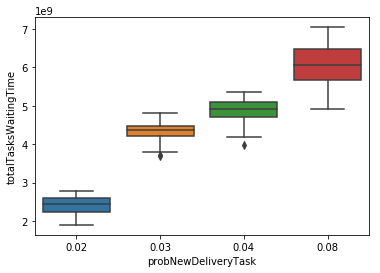

In [52]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasksWaitingTime")

##### Increasing probability of requests, total task waiting time

In [53]:
perform_t_test_range(1, 4, experiments, "totalTasksWaitingTime", "greater")

1 greater 2
The results of the independent t-test are: 
	t-value = 56.9084934691678015
	p-value = 0.000
The difference between groups is 1920325096.7 [1853781169.4 to 1986869024.0] (mean [95% CI])
Reject null hypothesis

1 greater 3
The results of the independent t-test are: 
	t-value = 65.8594474497742652
	p-value = 0.000
The difference between groups is 2464278313.2 [2390490875.1 to 2538065751.4] (mean [95% CI])
Reject null hypothesis

1 greater 4
The results of the independent t-test are: 
	t-value = 68.6078069866209717
	p-value = 0.000
The difference between groups is 3658395346.5 [3553240847.6 to 3763549845.4] (mean [95% CI])
Reject null hypothesis

2 greater 3
The results of the independent t-test are: 
	t-value = 14.4246434101107610
	p-value = 0.000
The difference between groups is 543953216.5 [469588449.3 to 618317983.8] (mean [95% CI])
Reject null hypothesis

2 greater 4
The results of the independent t-test are: 
	t-value = 32.4696043397648637
	p-value = 0.000
The difference 

# Plots for question 2

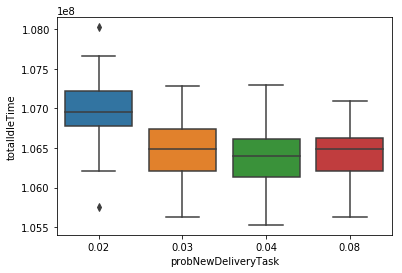

In [54]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalIdleTime")

##### Increasing probability of requests, idle time

In [55]:
perform_t_test_range(1, 4, experiments, "totalIdleTime", "greater")

1 greater 2
The results of the independent t-test are: 
	t-value = -10.7558783969925038
	p-value = 0.000
The difference between groups is -535980.0 [-634248.3 to -437711.7] (mean [95% CI])
Cannot reject null hypothesis

1 greater 3
The results of the independent t-test are: 
	t-value = -11.4424996004418809
	p-value = 0.000
The difference between groups is -591290.0 [-693193.8 to -489386.2] (mean [95% CI])
Cannot reject null hypothesis

1 greater 4
The results of the independent t-test are: 
	t-value = -11.9534439740242355
	p-value = 0.000
The difference between groups is -560020.0 [-652409.2 to -467630.8] (mean [95% CI])
Cannot reject null hypothesis

2 greater 3
The results of the independent t-test are: 
	t-value = -1.1012103835631557
	p-value = 0.272
The difference between groups is -55310.0 [-154357.6 to 43737.6] (mean [95% CI])
Cannot reject null hypothesis

2 greater 4
The results of the independent t-test are: 
	t-value = -0.5312992099073034
	p-value = 0.596
The difference betwe

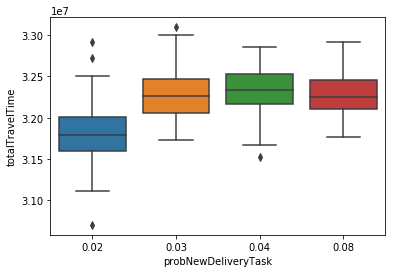

In [56]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTravelTime")

##### Increasing probability of requests, tavel time

In [57]:
perform_t_test_range(1, 4, experiments, "totalTravelTime", "greater")

1 greater 2
The results of the independent t-test are: 
	t-value = 10.5827871935403088
	p-value = 0.000
The difference between groups is 496590.0 [404054.4 to 589125.6] (mean [95% CI])
Reject null hypothesis

1 greater 3
The results of the independent t-test are: 
	t-value = 11.3646524001818108
	p-value = 0.000
The difference between groups is 520940.0 [430545.4 to 611334.6] (mean [95% CI])
Reject null hypothesis

1 greater 4
The results of the independent t-test are: 
	t-value = 11.3043142370366230
	p-value = 0.000
The difference between groups is 498790.0 [411777.0 to 585803.0] (mean [95% CI])
Reject null hypothesis

2 greater 3
The results of the independent t-test are: 
	t-value = 0.5900041564654952
	p-value = 0.556
The difference between groups is 24350.0 [-57036.9 to 105736.9] (mean [95% CI])
Cannot reject null hypothesis

2 greater 4
The results of the independent t-test are: 
	t-value = 0.0558976791220182
	p-value = 0.955
The difference between groups is 2200.0 [-75413.9 to 798

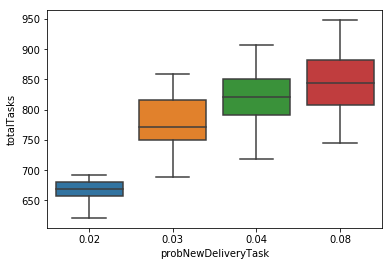

In [58]:
drawBoxPlotForExperiments(firstExps, "probNewDeliveryTask", "totalTasks")

##### Increasing probability of requests, amount of tasks

In [59]:
perform_t_test_range(1, 4, experiments, "totalTasks", "greater")

1 greater 2
The results of the independent t-test are: 
	t-value = 24.3973275456105192
	p-value = 0.000
The difference between groups is 110.8 [101.8 to 119.7] (mean [95% CI])
Reject null hypothesis

1 greater 3
The results of the independent t-test are: 
	t-value = 34.0329539692797383
	p-value = 0.000
The difference between groups is 152.2 [143.4 to 161.0] (mean [95% CI])
Reject null hypothesis

1 greater 4
The results of the independent t-test are: 
	t-value = 35.1125058584100955
	p-value = 0.000
The difference between groups is 177.6 [167.6 to 187.6] (mean [95% CI])
Reject null hypothesis

2 greater 3
The results of the independent t-test are: 
	t-value = 6.8769410599225926
	p-value = 0.000
The difference between groups is 41.4 [29.6 to 53.3] (mean [95% CI])
Reject null hypothesis

2 greater 4
The results of the independent t-test are: 
	t-value = 10.3277080836876696
	p-value = 0.000
The difference between groups is 66.9 [54.1 to 79.6] (mean [95% CI])
Reject null hypothesis

3 great

# Question 3

In [60]:
secondExps = getExperimentResultsForIds(experiments, [5,6,7,8])

# Plots for question 3

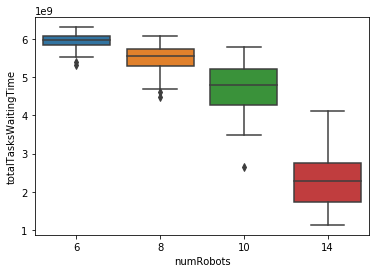

In [61]:
drawBoxPlotForExperiments(secondExps, "numRobots", "totalTasksWaitingTime")

##### Increasing amount of robots when many requests, totalTasksWaitingTime

In [62]:
perform_t_test_range(5, 8, experiments, "totalTasksWaitingTime", "greater")

5 greater 6
The results of the independent t-test are: 
	t-value = -12.1502921341276817
	p-value = 0.000
The difference between groups is -476161826.8 [-553443873.5 to -398879780.0] (mean [95% CI])
Cannot reject null hypothesis

5 greater 7
The results of the independent t-test are: 
	t-value = -19.5910078523151938
	p-value = 0.000
The difference between groups is -1261134768.4 [-1388079733.3 to -1134189803.4] (mean [95% CI])
Cannot reject null hypothesis

5 greater 8
The results of the independent t-test are: 
	t-value = -49.1530224229967772
	p-value = 0.000
The difference between groups is -3607178142.5 [-3751897998.9 to -3462458286.2] (mean [95% CI])
Cannot reject null hypothesis

6 greater 7
The results of the independent t-test are: 
	t-value = -11.0903787709737056
	p-value = 0.000
The difference between groups is -784972941.6 [-924551615.3 to -645394267.8] (mean [95% CI])
Cannot reject null hypothesis

6 greater 8
The results of the independent t-test are: 
	t-value = -39.5999384

In [70]:
thirdExps = getExperimentResultsForIds(experiments, [x for x in range(9,25)])

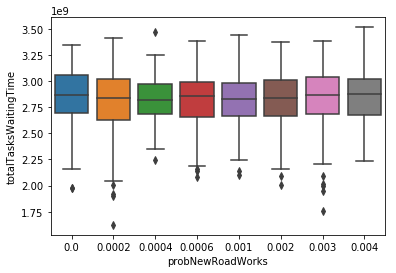

In [76]:
drawBoxPlotForExperiments(thirdExps, "probNewRoadWorks", "totalTasksWaitingTime")

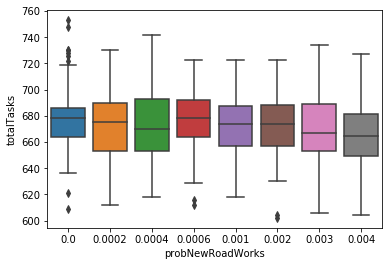

In [74]:
drawBoxPlotForExperiments(thirdExps, "probNewRoadWorks", "totalTasks")

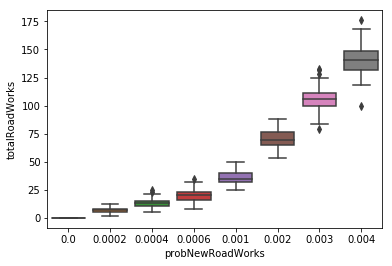

In [73]:
drawBoxPlotForExperiments(thirdExps, "probNewRoadWorks", "totalRoadWorks")